In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv',na_values=' ')

data.TotalCharges.fillna(0, inplace = True)
data.TotalCharges = data.TotalCharges.astype(float)

print(data.head())



   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

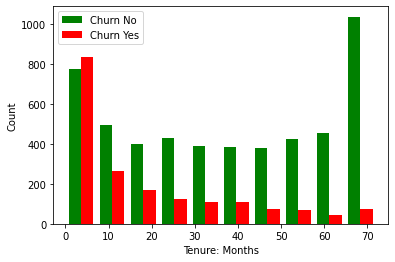

In [2]:
#Datavisualization

tenure_yes = data[data.Churn == 'Yes'].tenure
tenure_no = data[data.Churn == 'No'].tenure
plt.hist([tenure_no,tenure_yes], color=['Green', 'red'])
plt.legend(['Churn No','Churn Yes'])
plt.xlabel('Tenure: Months')
plt.ylabel('Count')
plt.show()

In [3]:
#Creating our features featuresframe

data = data.replace(['No phone service', 'No internet service'],'No')
features = data.drop(['customerID'], axis=1)

yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    features[col].replace({'Yes': 1, 'No':0},inplace=True)

features.gender.replace({'Female': 1, 'Male': 0}, inplace=True)

df = pd.get_dummies(data=features, columns=['InternetService','Contract','PaymentMethod'])







from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

cols_to_scale = ['tenure', 'TotalCharges', 'MonthlyCharges']

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])




X = df.drop('Churn', axis='columns')
y = df.Churn
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.472222,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.027778,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.625000,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.027778,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.333333,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.152778,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.055556,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [14]:
#Building model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=5)
model = LinearRegression()
model.fit(x_train, y_train)
y_predict = model.predict(x_test)


model.coef_

X




array([ 9.98437588e-03,  4.49504459e-02, -2.14498734e-04, -1.80263202e-02,
       -1.04975844e-01,  4.69037874e-02,  6.40161056e-02, -3.81400453e-02,
        1.26895832e-02,  2.30386637e-02, -2.76694164e-02,  9.74457908e-02,
        7.94847814e-02,  5.20146732e-02, -3.53052437e-01, -4.56660750e-01,
       -2.40566713e+12, -2.40566713e+12, -2.40566713e+12,  2.95081192e+12,
        2.95081192e+12,  2.95081192e+12, -1.01545221e+12, -1.01545221e+12,
       -1.01545221e+12, -1.01545221e+12])

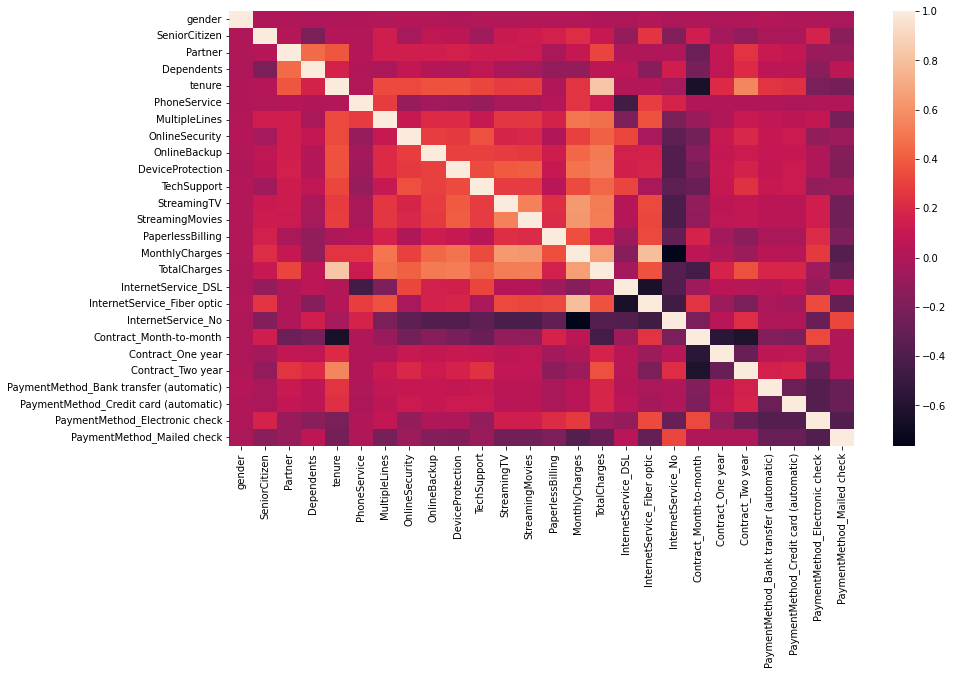

In [5]:
#Feature Engineering
import seaborn as sns
fig_dims = (14,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(X.corr(), ax=ax)
plt.show()


In [23]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS


sfs = SFS(model,
          k_features=15,
          forward=True,
          scoring='neg_mean_squared_error',
          cv=cv  )
sfs.fit(X, y)

sfs.subsets_



{1: {'feature_idx': (19,),
  'cv_scores': array([-0.16295599]),
  'avg_score': -0.16295598901446393,
  'feature_names': ('Contract_Month-to-month',)},
 2: {'feature_idx': (17, 19),
  'cv_scores': array([-0.15389121]),
  'avg_score': -0.1538912138640777,
  'feature_names': ('InternetService_Fiber optic', 'Contract_Month-to-month')},
 3: {'feature_idx': (4, 17, 19),
  'cv_scores': array([-0.14788551]),
  'avg_score': -0.1478855062017837,
  'feature_names': ('tenure',
   'InternetService_Fiber optic',
   'Contract_Month-to-month')},
 4: {'feature_idx': (4, 17, 19, 24),
  'cv_scores': array([-0.14546586]),
  'avg_score': -0.14546586328558378,
  'feature_names': ('tenure',
   'InternetService_Fiber optic',
   'Contract_Month-to-month',
   'PaymentMethod_Electronic check')},
 5: {'feature_idx': (4, 13, 17, 19, 24),
  'cv_scores': array([-0.14453308]),
  'avg_score': -0.1445330752562663,
  'feature_names': ('tenure',
   'PaperlessBilling',
   'InternetService_Fiber optic',
   'Contract_Month-

In [ ]:
sns

In [ ]:
""" #f
from curses.ascii import FF


F_FULLFSYNCff """

In [8]:


#import tensorflow as tf
#from tensorflow import keras

#model = keras.Sequential([
   # keras.layers.Dense(20, input_shape=(26,), activation ='relu'),
  #  keras.layers.Dense(20, activation ='relu'),
 #   keras.layers.Dense(1,activation='sigmoid'),
#])




#model.compile(optimizer="adam", 
 #   loss='binary_crossentropy',
 #   metrics=['accuracy'])

#model.fit(x_train, y_train, epochs=5)







Epoch 1/5
177/177 [==============================] - 0s 848us/step - loss: 0.5172 - accuracy: 0.7501
Epoch 2/5
177/177 [==============================] - 0s 1ms/step - loss: 0.4314 - accuracy: 0.7923
Epoch 3/5
177/177 [==============================] - 0s 983us/step - loss: 0.4221 - accuracy: 0.8021
Epoch 4/5
177/177 [==============================] - 0s 818us/step - loss: 0.4169 - accuracy: 0.8067
Epoch 5/5
177/177 [==============================] - 0s 879us/step - loss: 0.4145 - accuracy: 0.8074


In [9]:
model.evaluate(x_test, y_test)

yp = model.predict(x_test)

y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


45/45 [==============================] - 0s 545us/step


              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1023
           1       0.63      0.54      0.58       386

    accuracy                           0.79      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.78      0.79      0.78      1409



Text(69.0, 0.5, 'Truth')

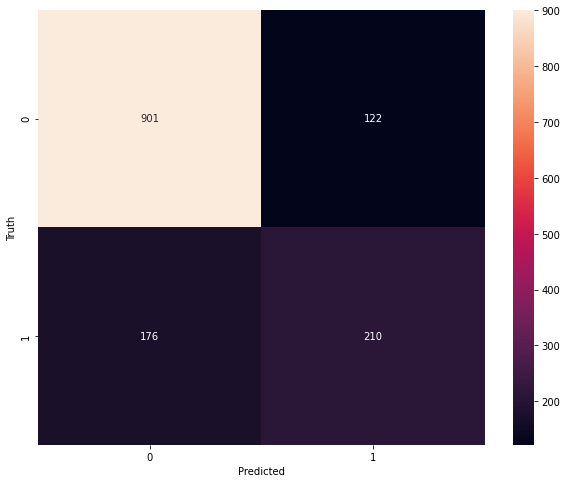

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))


import seaborn as sns

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred )
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')